# Simulation Playground Notebook
This notebook is designed as a easy einterface to call the functions that we have defined

In [43]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import torch.optim as optim
import torch.nn as nn
import torch

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_participants_info, load_event_descriptions, load_behavioral_data, preprocess_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Preparation
Let's prepare some data first to fit our model. We are specifically using ["Locus coeruleus activity strengthens prioritized memories under arousal"](https://openneuro.org/datasets/ds002011/versions/1.0.0) dataset fror now.

In [20]:
DATASET_PATH = "data"
participants_df = load_participants_info(DATASET_PATH)
load_event_descriptions(DATASET_PATH)

df_behavior = load_behavioral_data(DATASET_PATH, "01")
for idx in range(2,11):
    sample_participant = f"0{idx}"
    df = load_behavioral_data(DATASET_PATH, sample_participant)
    df_behavior = pd.concat([df, df_behavior], ignore_index=True)

Let's preprocess our data first

In [21]:
X, Y, X_tensor, Y_tensor, scaler_X, scaler_Y, df_clean = preprocess_data(df_behavior)

df_clean

X Shape: torch.Size([1699, 7]), Y Shape: torch.Size([1699])
Y Min: -1.0, Y Max: 1.0


Condition  PreEvent_PupilMax TrialEvent    onset  duration  \
0      NEUTRAL             42.800   MoneyCue    2.117       1.0   
1      NEUTRAL             46.912      Image    5.133       2.5   
2     AROUSING             51.300   MoneyCue   14.865       1.0   
3     AROUSING             43.533      Image   21.865       2.5   
4      NEUTRAL             50.733   MoneyCue   31.580       1.0   
...        ...                ...        ...      ...       ...   
1694   NEUTRAL             40.255      Image  320.734       2.5   
1695   NEUTRAL             36.967   MoneyCue  329.566       1.0   
1696   NEUTRAL             39.533      Image  332.566       2.5   
1697  AROUSING             42.949   MoneyCue  342.381       1.0   
1698  AROUSING             41.500      Image  349.381       2.5   

      Event_PupilDilation  
0                 1.47280  
1                 7.18640  
2                -1.70980  
3                 6.13880  
4                -1.96280  
...                   ...  
1694              0.64647  
1695              0.34481  
1696              1.22080  
1697             -0.82240  
1698              2.40160  

[1699 rows x 6 columns]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

# Training

In [47]:
from train import (train_feed_forward_nn,
                   train_vanilla_rnn,
                   train_vanilla_lstm,
                   train_vanilla_lc_model,
                   train_lstm_lc_model,
                   train_neural_gadget_model
                   )
from analysis.evaluation import evaluate_model

## Fully Connected Neural Network

To illustrate our idea, we want to train 2 models from math and computer science, which is our vanilla feed forward networks and an recurrent networks.

In [48]:
model_ff = train_feed_forward_nn(X_train, Y_train,epochs=2000)
evaluate_model(model_ff, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

Epoch 0, Loss: 0.07607277482748032
Epoch 100, Loss: 0.047145694494247437
Epoch 200, Loss: 0.04579171910881996
Epoch 300, Loss: 0.04506409168243408
Epoch 400, Loss: 0.04407178983092308
Epoch 500, Loss: 0.043114714324474335
Epoch 600, Loss: 0.041997455060482025
Epoch 700, Loss: 0.04144483059644699
Epoch 800, Loss: 0.04055862873792648
Epoch 900, Loss: 0.040168508887290955
Epoch 1000, Loss: 0.040928713977336884
Epoch 1100, Loss: 0.039228130131959915
Epoch 1200, Loss: 0.0389215461909771
Epoch 1300, Loss: 0.03854671120643616
Epoch 1400, Loss: 0.03833291307091713
Epoch 1500, Loss: 0.03859603404998779
Epoch 1600, Loss: 0.038670700043439865
Epoch 1700, Loss: 0.03809160366654396
Epoch 1800, Loss: 0.03756420686841011
Epoch 1900, Loss: 0.03819367662072182
Training complete!
Evaluating Model: FeedForwardNN


ValueError: Unsupported model type: FeedForwardNN

## Recurent Neural Networks

We will  do the same thing with an recurrent neural network

X_rnn Shape: torch.Size([1359, 1, 7]), Y_rnn Shape: torch.Size([1359, 1])
Epoch 0, Loss: 0.1753
Epoch 100, Loss: 0.0513
Epoch 200, Loss: 0.0495
Epoch 300, Loss: 0.0490
Epoch 400, Loss: 0.0486
Epoch 500, Loss: 0.0482
Epoch 600, Loss: 0.0480
Epoch 700, Loss: 0.0477
Epoch 800, Loss: 0.0475
Epoch 900, Loss: 0.0473
Epoch 1000, Loss: 0.0473
Epoch 1100, Loss: 0.0472
Epoch 1200, Loss: 0.0472
Epoch 1300, Loss: 0.0472
Epoch 1400, Loss: 0.0470
Epoch 1500, Loss: 0.0470
Epoch 1600, Loss: 0.0469
Epoch 1700, Loss: 0.0469
Epoch 1800, Loss: 0.0467
Epoch 1900, Loss: 0.0466
Training complete!
Evaluating Model: RecurrentNet


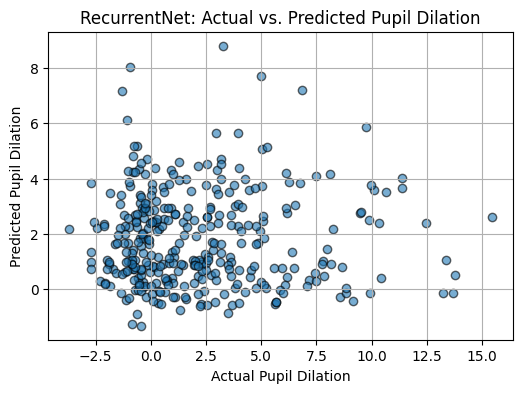

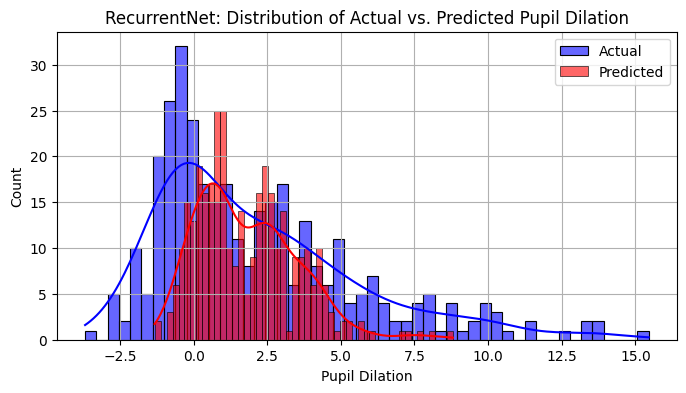

RecurrentNet - Pearson Correlation: 0.0105


In [26]:
model_rnn = train_vanilla_rnn(X_train, Y_train, epochs=2000)
evaluate_model(model_rnn, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM Models

Epoch 0, Loss: 0.159675
Epoch 100, Loss: 0.100061
Epoch 200, Loss: 0.076846
Epoch 300, Loss: 0.075331
Epoch 400, Loss: 0.065417
Epoch 500, Loss: 0.063650
Epoch 600, Loss: 0.078510
Epoch 700, Loss: 0.079043
Epoch 800, Loss: 0.078873
Epoch 900, Loss: 0.078862
Epoch 1000, Loss: 0.109407
Epoch 1100, Loss: 0.068193
Epoch 1200, Loss: 0.072144
Epoch 1300, Loss: 0.085297
Epoch 1400, Loss: 0.075383
Epoch 1500, Loss: 0.097391
Epoch 1600, Loss: 0.064988
Epoch 1700, Loss: 0.115553
Epoch 1800, Loss: 0.102845
Epoch 1900, Loss: 0.059683
Epoch 2000, Loss: 0.060290
Epoch 2100, Loss: 0.068088
Epoch 2200, Loss: 0.078375
Epoch 2300, Loss: 0.061987
Epoch 2400, Loss: 0.077241
Epoch 2500, Loss: 0.092800
Epoch 2600, Loss: 0.120733
Epoch 2700, Loss: 0.070826
Epoch 2800, Loss: 0.125510
Epoch 2900, Loss: 0.084765
Epoch 3000, Loss: 0.079147
Epoch 3100, Loss: 0.088890
Epoch 3200, Loss: 0.096007
Epoch 3300, Loss: 0.101228
Epoch 3400, Loss: 0.092596
Epoch 3500, Loss: 0.085652
Epoch 3600, Loss: 0.087851
Epoch 3700, L

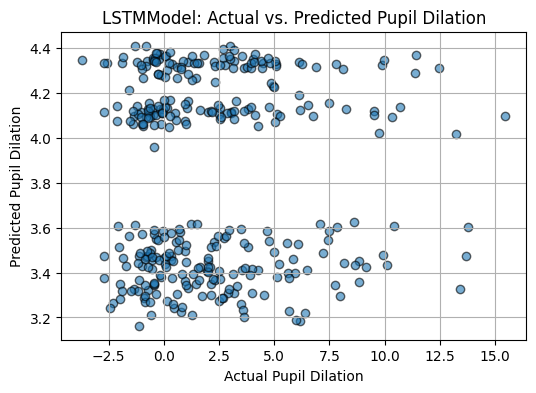

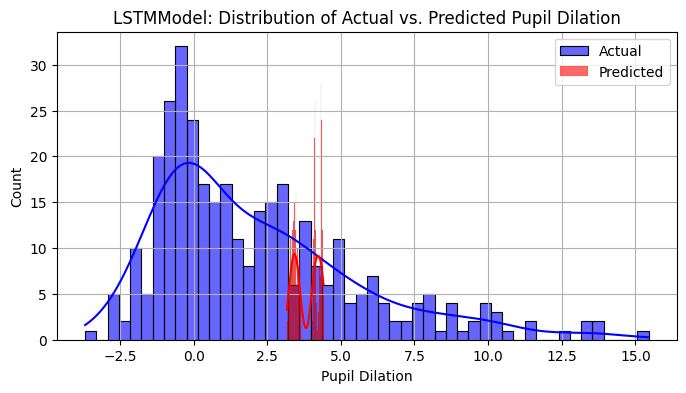

LSTMModel - Pearson Correlation: 0.0156


In [51]:
model_lstm = train_vanilla_lstm(X_train, Y_train, epochs=5000, hidden_dim=34)
evaluate_model(model_lstm, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## Vanilla LCNECortex Model

Now coming to our customized LCNECortex model

Epoch 0, Loss: 1.2640827894210815
Epoch 100, Loss: 0.1448950469493866


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 200, Loss: 0.05258527770638466
Epoch 300, Loss: 0.0909033790230751
Epoch 400, Loss: 0.066231369972229
Epoch 500, Loss: 0.059342071413993835
Epoch 600, Loss: 0.06612946093082428
Epoch 700, Loss: 0.09732740372419357
Epoch 800, Loss: 0.07187619805335999
Epoch 900, Loss: 0.05533570051193237
Epoch 1000, Loss: 0.08198949694633484
Epoch 1100, Loss: 0.06981003284454346
Epoch 1200, Loss: 0.08320046961307526
Epoch 1300, Loss: 0.06259652972221375
Epoch 1400, Loss: 0.06086341291666031
Epoch 1500, Loss: 0.06562910974025726
Epoch 1600, Loss: 0.06980402022600174
Epoch 1700, Loss: 0.062351349741220474
Epoch 1800, Loss: 0.0737871453166008
Epoch 1900, Loss: 0.04993607848882675
Training complete!
Evaluating Model: LCNECortexFitter


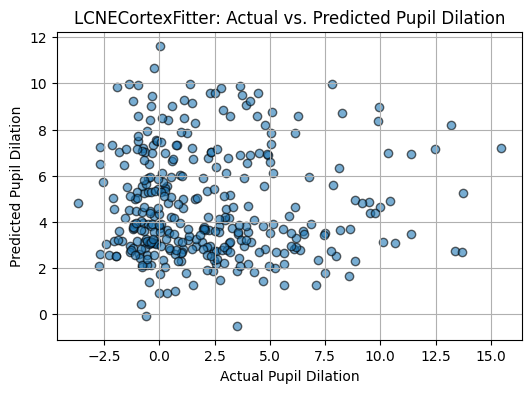

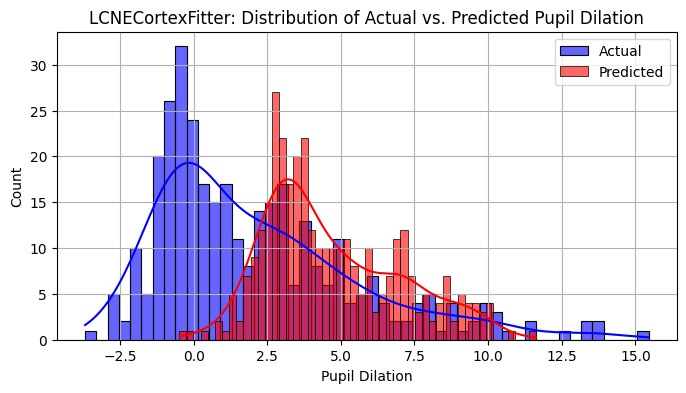

LCNECortexFitter - Pearson Correlation: 0.0115


In [8]:
model_lc_vanilla = train_vanilla_lstm(X_train, Y_train, epochs=2000, hidden_dim=34)
evaluate_model(model_lc_vanilla, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM LCNECortex Model

Epoch 0, Loss: 0.20080150663852692


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/nn/modules/loss.py:1040: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


Epoch 100, Loss: 0.03403923287987709
Epoch 200, Loss: 0.017935968935489655
Epoch 300, Loss: 0.032827265560626984
Epoch 400, Loss: 0.021508779376745224
Epoch 500, Loss: 0.0179140605032444
Epoch 600, Loss: 0.023790568113327026
Epoch 700, Loss: 0.024299975484609604
Epoch 800, Loss: 0.02911348268389702
Epoch 900, Loss: 0.03155292570590973
Epoch 1000, Loss: 0.02758178487420082
Epoch 1100, Loss: 0.014986477792263031
Epoch 1200, Loss: 0.025353679433465004
Epoch 1300, Loss: 0.022695103660225868
Epoch 1400, Loss: 0.03320975601673126
Epoch 1500, Loss: 0.017712682485580444
Epoch 1600, Loss: 0.01924438588321209
Epoch 1700, Loss: 0.022922640666365623
Epoch 1800, Loss: 0.034426238387823105
Epoch 1900, Loss: 0.032959312200546265
Training complete!
Evaluating Model: LCNECortexLSTM


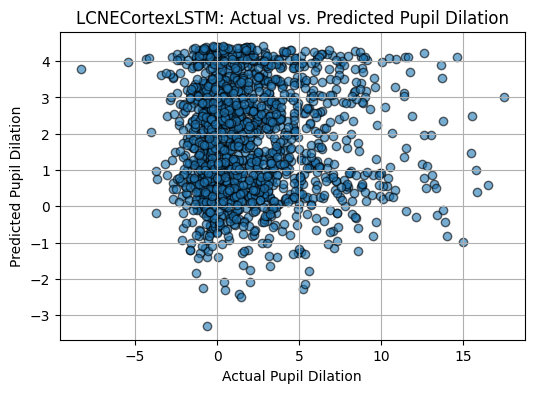

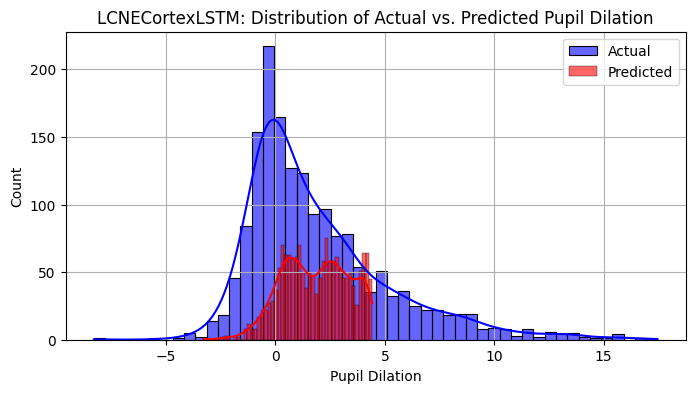

LCNECortexLSTM - Pearson Correlation: -0.0261


In [9]:
model_lc_lstm = train_lstm_lc_model(X_train, Y_train, epochs=2000, hidden_dim=64)
evaluate_model(model_lc_lstm, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM Gadget Model

Epoch 0, Loss: 0.082250, LR: 0.001000


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 100, Loss: 0.025428, LR: 0.000000
Epoch 200, Loss: 0.021674, LR: 0.000000
Epoch 300, Loss: 0.018571, LR: 0.000000
Epoch 400, Loss: 0.029746, LR: 0.000000
Epoch 500, Loss: 0.024524, LR: 0.000000
Epoch 600, Loss: 0.024100, LR: 0.000000
Epoch 700, Loss: 0.031769, LR: 0.000000
Epoch 800, Loss: 0.032708, LR: 0.000000
Epoch 900, Loss: 0.026691, LR: 0.000000
Epoch 1000, Loss: 0.022076, LR: 0.000000
Epoch 1100, Loss: 0.030318, LR: 0.000000
Epoch 1200, Loss: 0.039242, LR: 0.000000
Epoch 1300, Loss: 0.044846, LR: 0.000000
Epoch 1400, Loss: 0.018830, LR: 0.000000
Epoch 1500, Loss: 0.020613, LR: 0.000000
Early stopping at epoch 1514
Training complete!
Evaluating Model: LSTMGadget


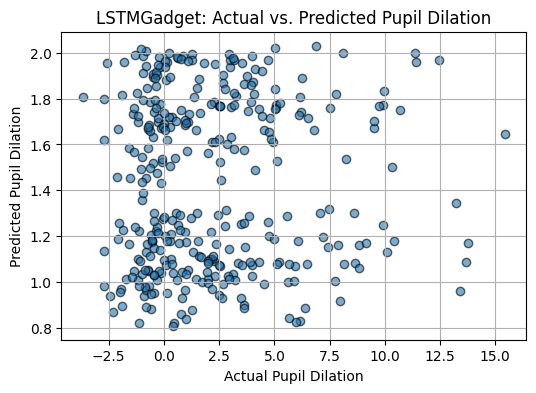

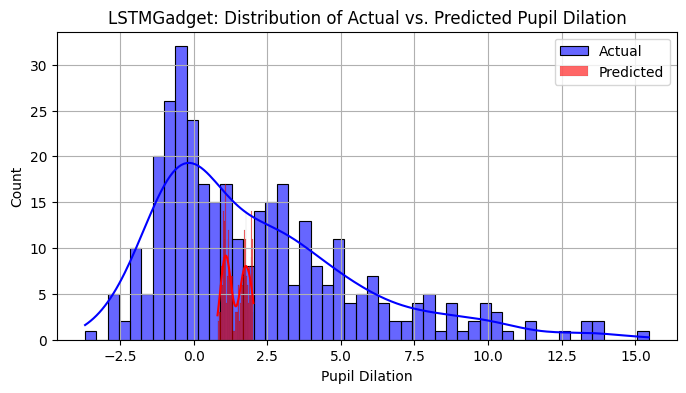

LSTMGadget - Pearson Correlation: 0.0292


In [10]:
model_gadget = train_neural_gadget_model(X_train, Y_train, epochs=2000, hidden_dim=64)
evaluate_model(model_gadget, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

Interesting results

# Analysis

In [34]:
from analysis.analysis import (pca_gadget,
                               pca_lcne_lstm,
                               pca_feed_forward,
                               pca_lcne,
                               firing_lcne,
                               pca_lstm,
)

## Feed-Forward Neural Networks

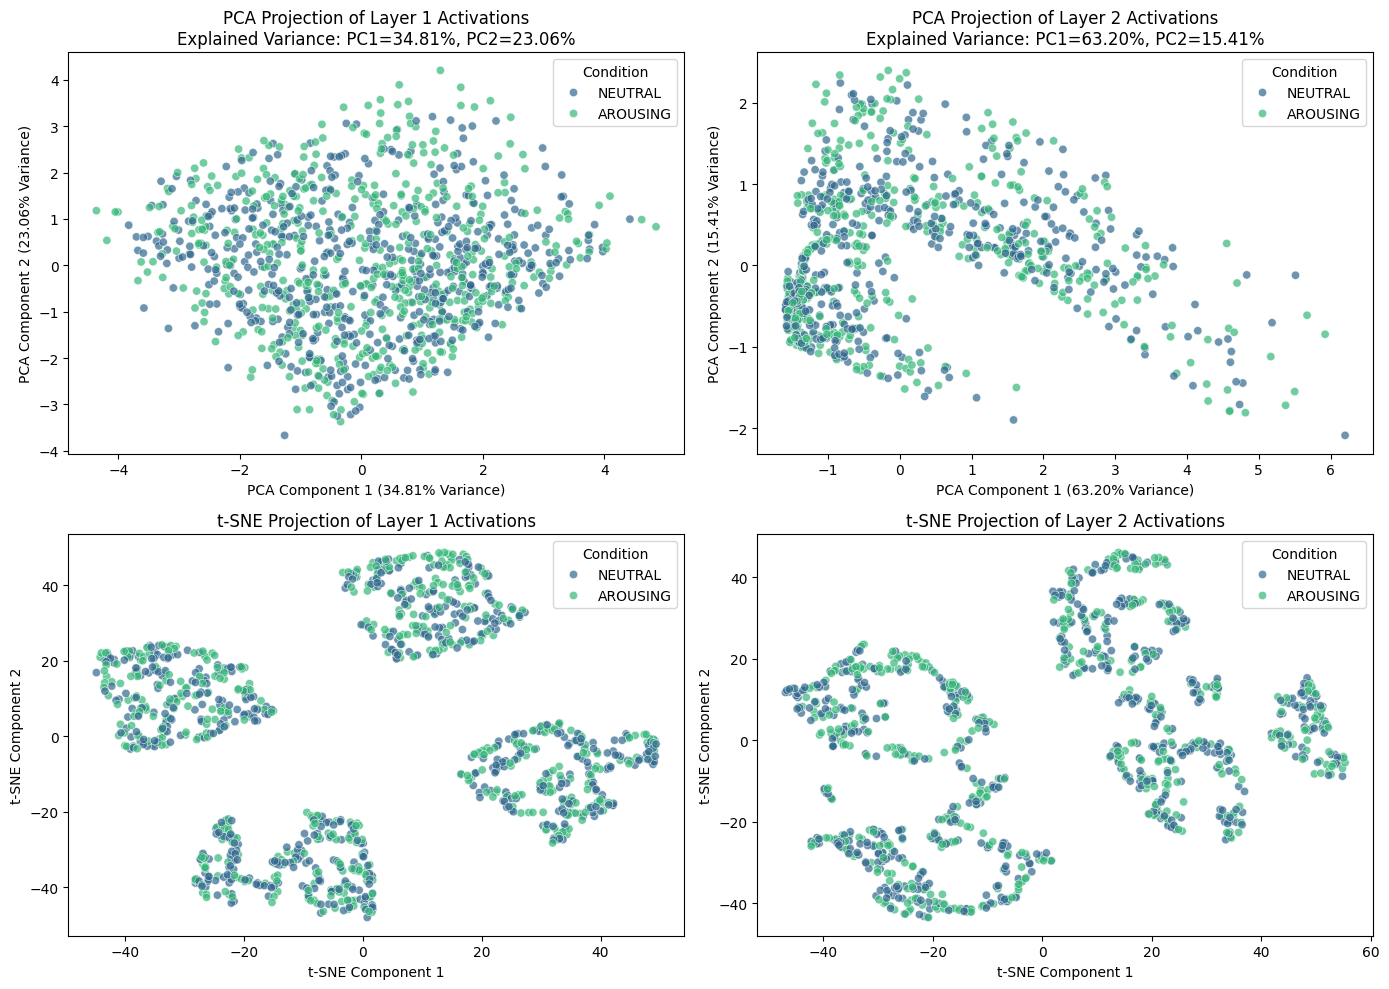

In [12]:
pca_feed_forward(model_ff, X_tensor, df_behavior)

## LCNECortex Model

We will see that, though  under fitted with the real data, there are some structureness to the data that we can play around with since we injected mechanistic insights into it.

Text(0.5, 1.0, 'Cortex Activation Distribution')

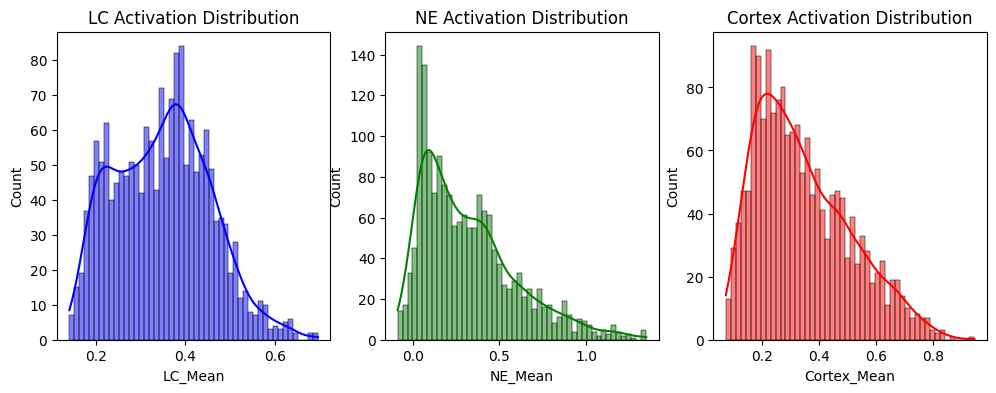

In [13]:
with torch.no_grad():
    prev_LC = torch.zeros(X_tensor.shape[0], model_lc_vanilla.hidden_dim)
    prev_Cortex = torch.zeros(X_tensor.shape[0], model_lc_vanilla.hidden_dim)

    LC_act, NE_act, C_act, Pupil_pred, LC_raw, NE_raw, C_raw = model_lc_vanilla(X_tensor, prev_LC, prev_Cortex, return_activations=True)

act_lc = LC_act.cpu().numpy()
act_ne = NE_act.cpu().numpy()
act_cortex = C_act.cpu().numpy()

df_activations = pd.DataFrame({
    'LC_Mean': act_lc.mean(axis=1),
    'NE_Mean': act_ne.mean(axis=1),
    'Cortex_Mean': act_cortex.mean(axis=1),
    'PupilPred': Pupil_pred.cpu().numpy().squeeze(),
    'ActualPupil': df_clean['Event_PupilDilation'].values  # Ensure this aligns with X_tensor
})

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_activations['LC_Mean'], kde=True, bins=50, color='blue')
plt.title("LC Activation Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df_activations['NE_Mean'], kde=True, bins=50, color='green')
plt.title("NE Activation Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df_activations['Cortex_Mean'], kde=True, bins=50, color='red')
plt.title("Cortex Activation Distribution")

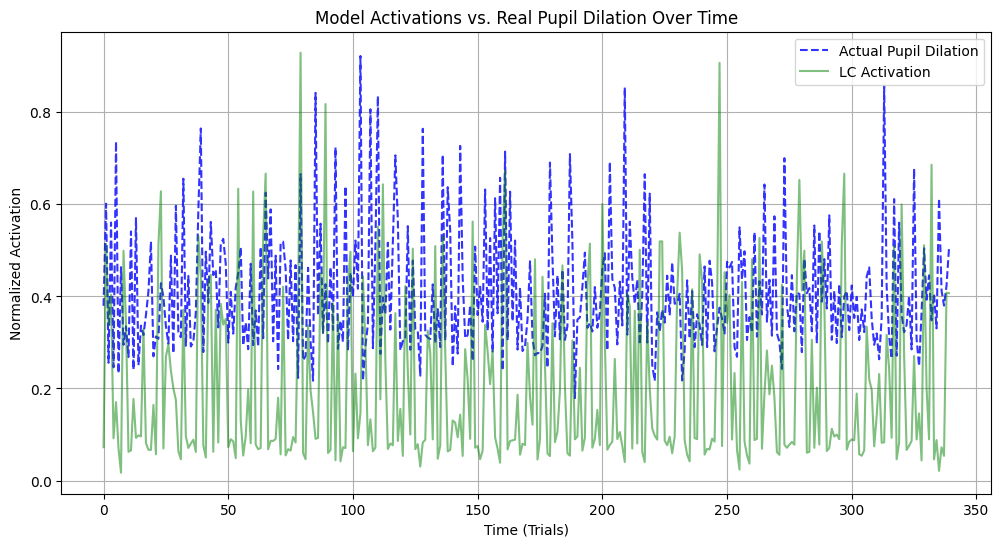

Correlation with Actual Pupil Dilation:
LC Activation: 0.052
NE Activation: 0.037
Cortex Activation: -0.001
Predicted Pupil Dilation: 0.011


In [14]:
firing_lcne(model_lc_vanilla, X_test, df_clean)

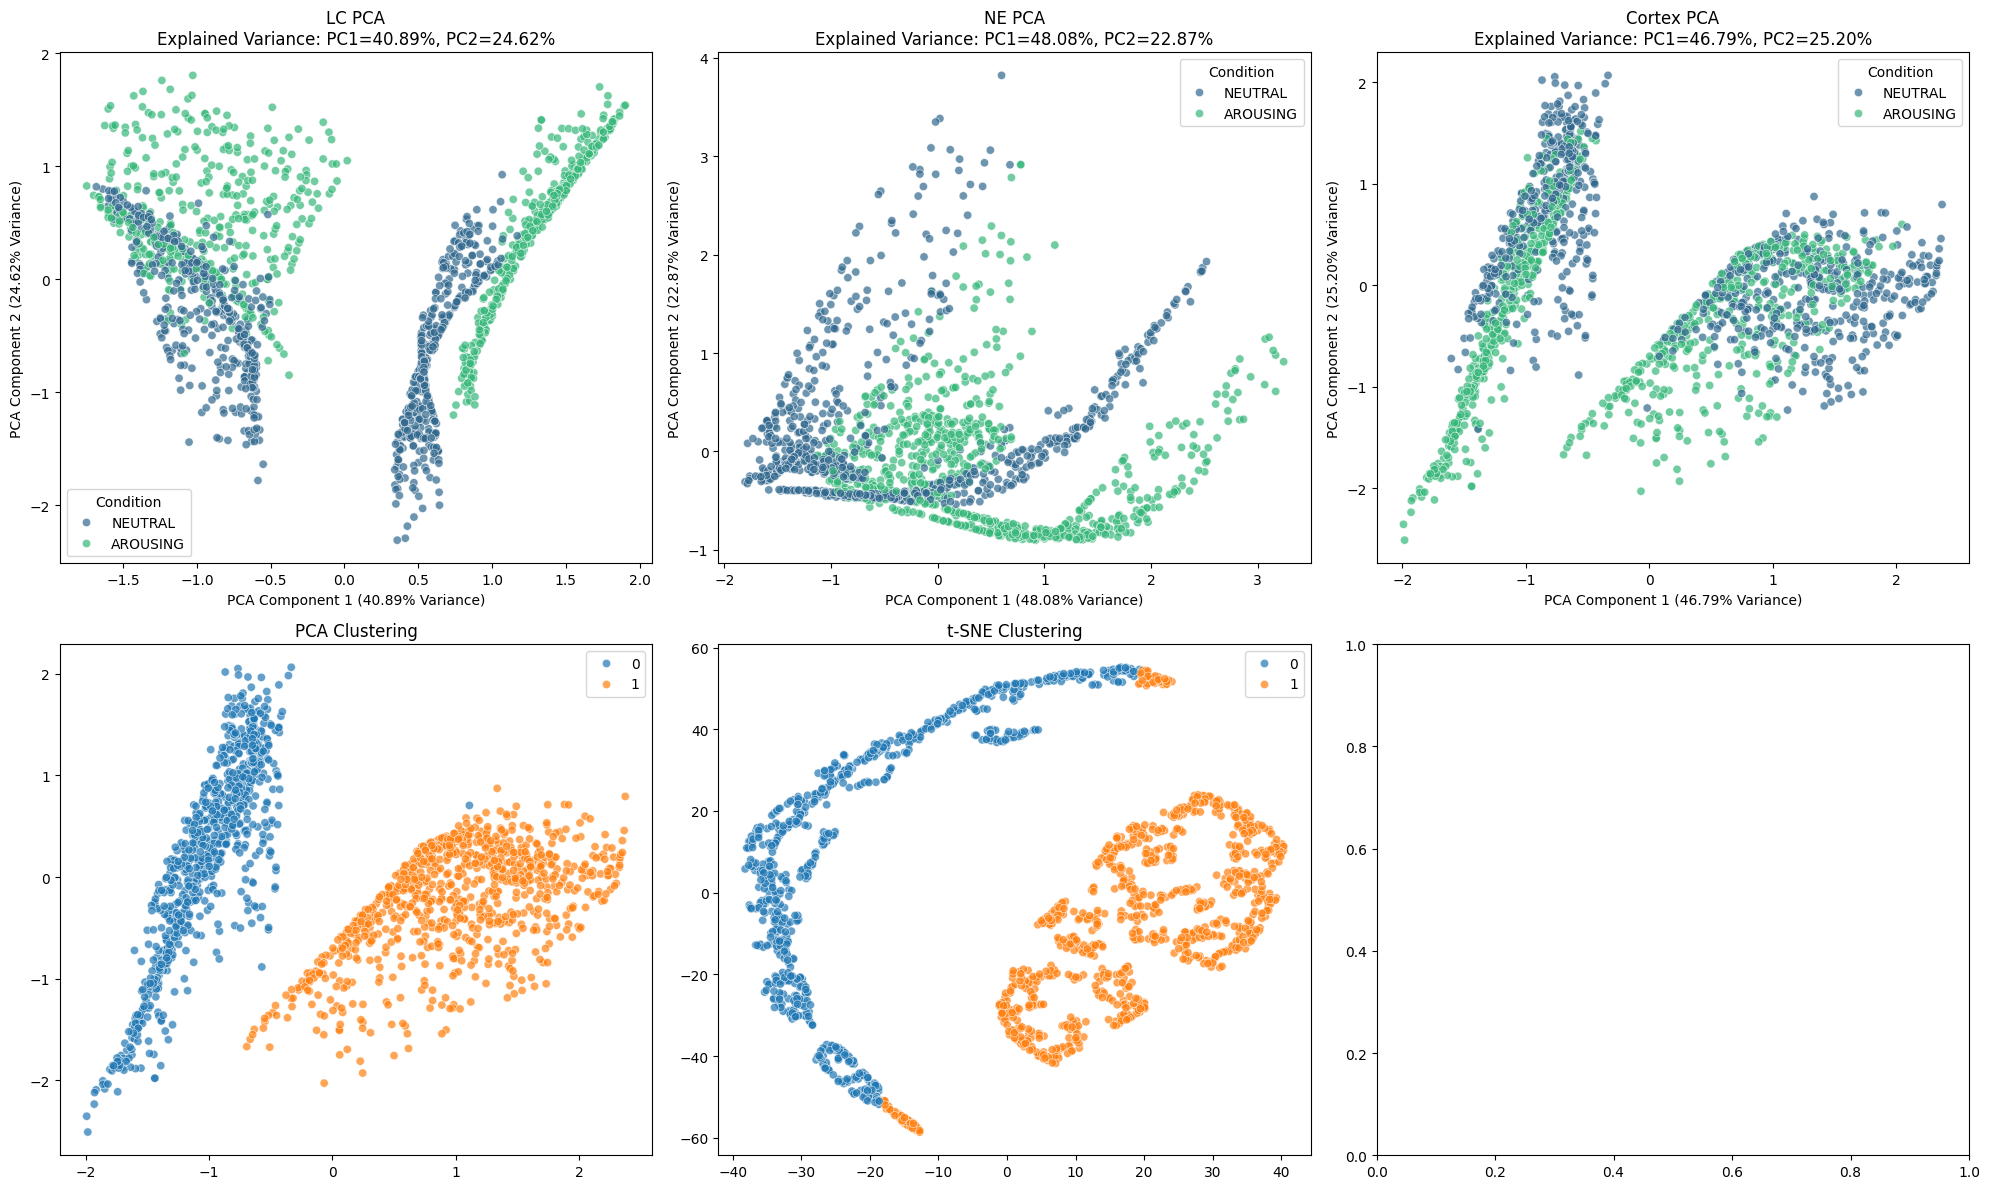

In [15]:
pca_lcne(model_lc_vanilla, X_tensor, df_clean)

## LSTM LCNECortex Model

(1699,) (1699,) (1699, 64)


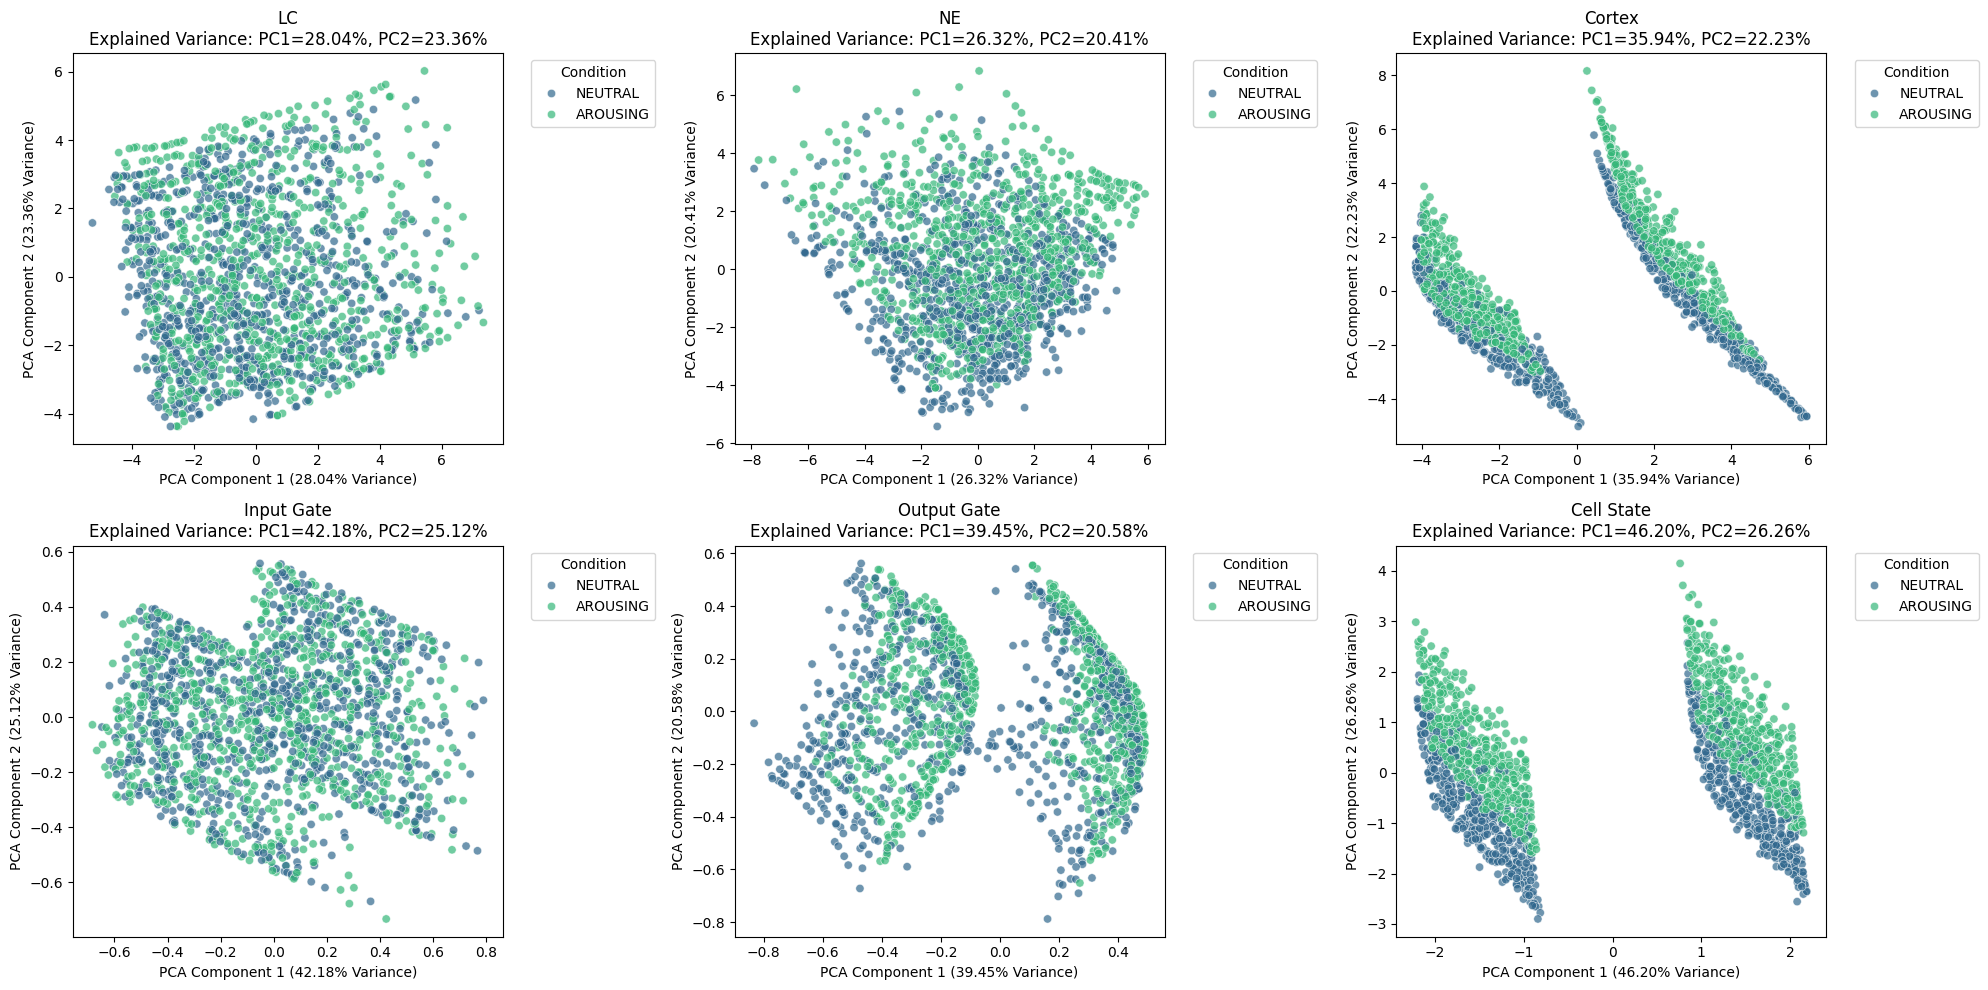

In [16]:
pca_lcne_lstm(model_lc_lstm, X_tensor, df_clean)

## LSTM Gadget Analysis

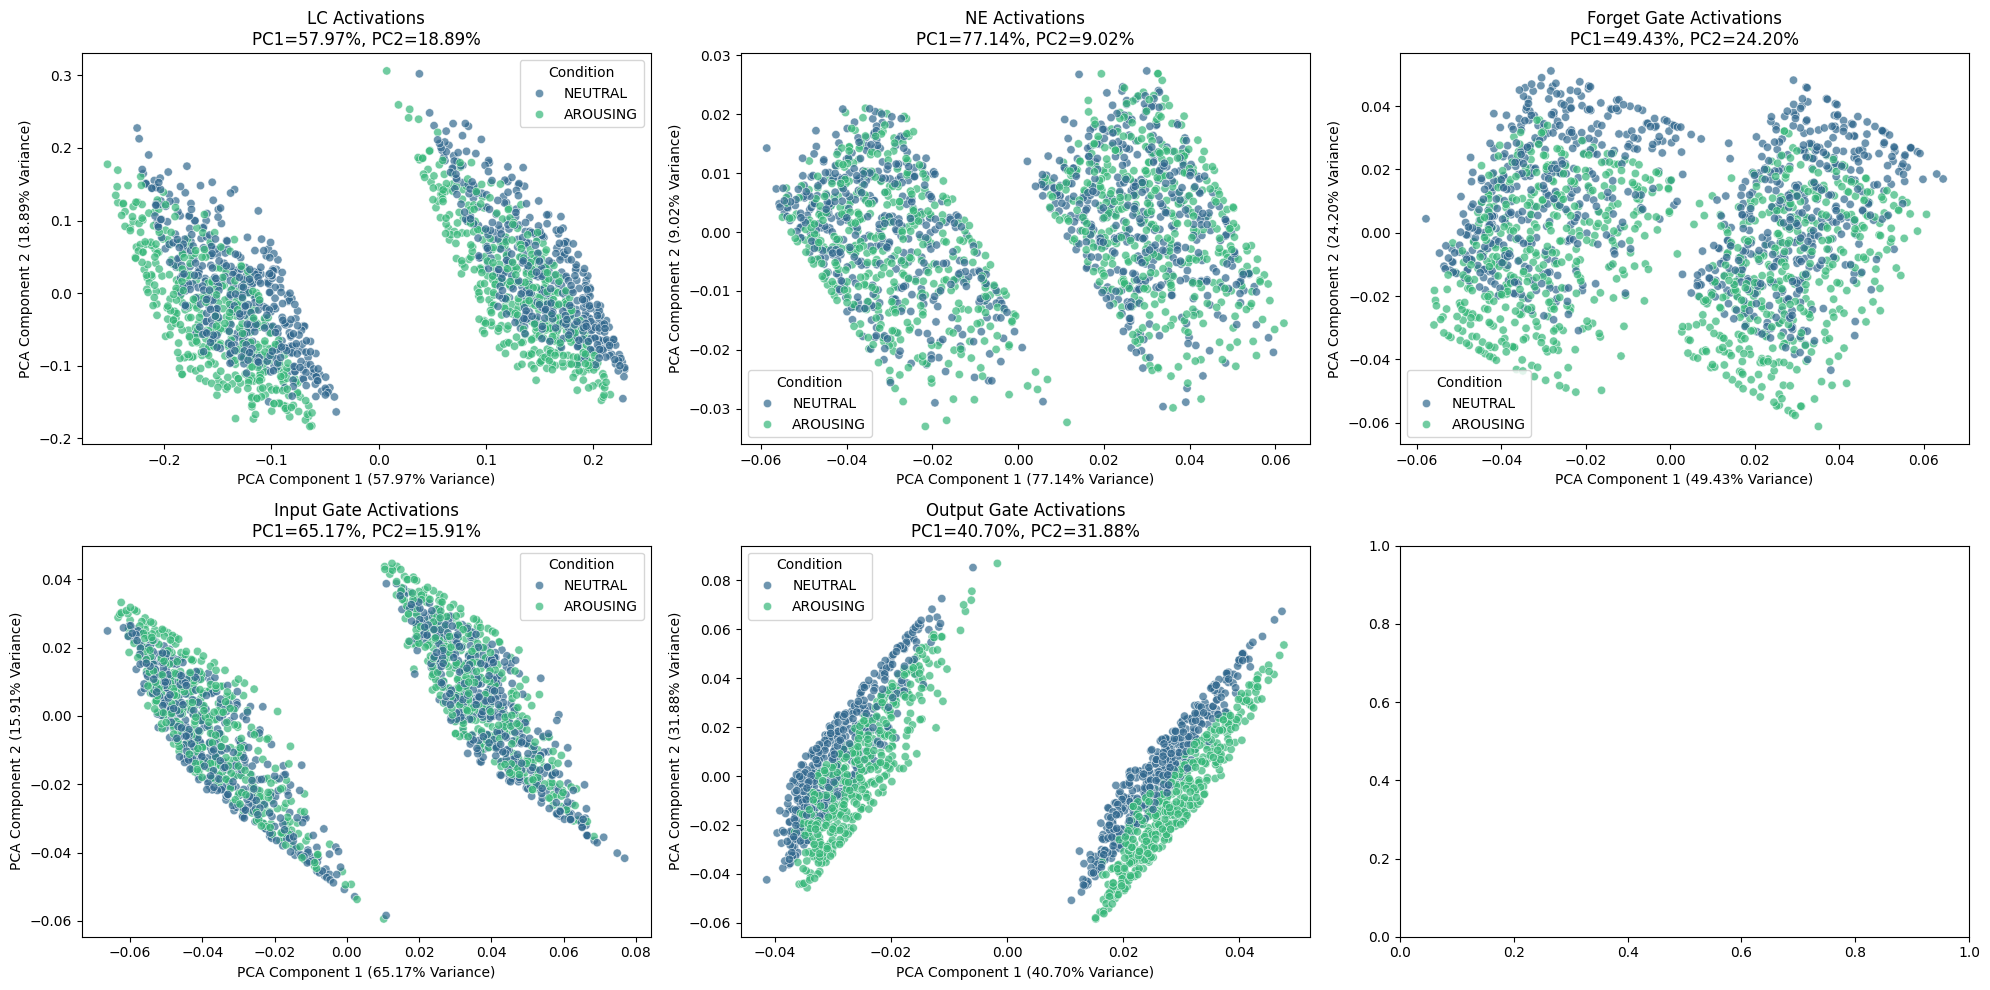

Pearson Correlation with Actual Pupil Dilation:
LC Activation: 0.369
NE Activation: 0.340
Forget Gate: 0.139
Input Gate: 0.031
Output Gate: -0.296
Predicted Pupil Dilation: 0.392


In [17]:
pca_gadget(model_gadget, X_tensor, df_clean)

## Vanilla LSTM Comparison

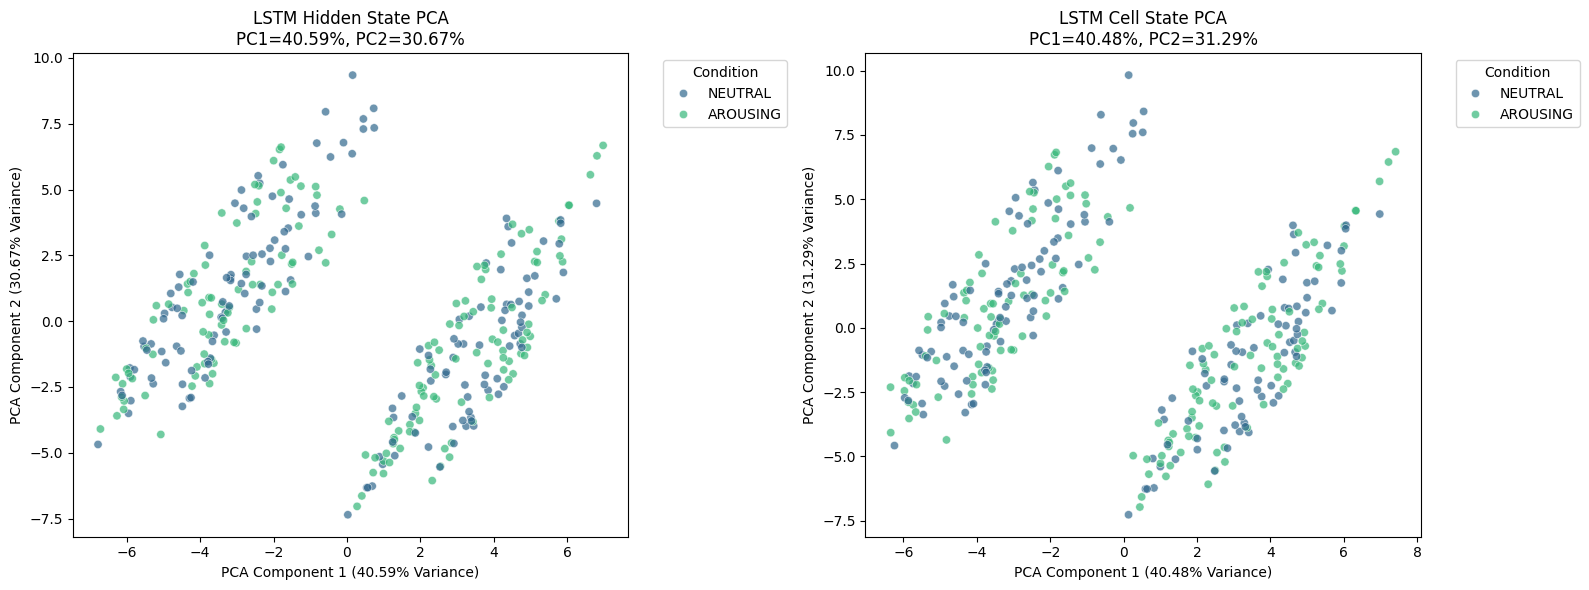

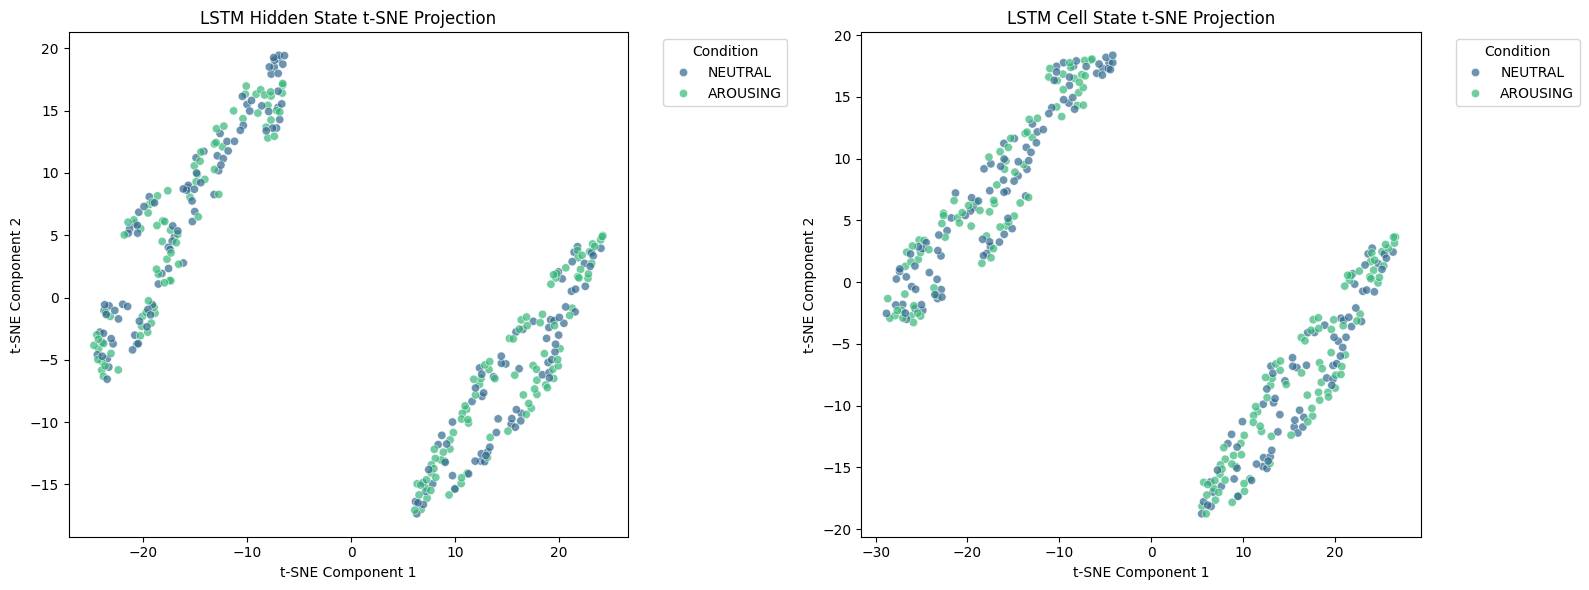

Pearson Correlation with Actual Pupil Dilation:
Hidden State Mean: 0.042
Cell State Mean: 0.048


In [54]:
pca_lstm(model_lstm, X_test, df_clean)